In [1]:
# import packages
import string                   # module with string utilities
import pandas as pd             # large module with many utilities for dataframes, here aliased as 'pd' 
from pandas import DataFrame, Series
import numpy as np              # large module with many numeric and mathematical utilities, here aliased as 'np'
import matplotlib.pyplot as plt # module for plotting

# "magic" syntax to display matplotlib graphics in a notebook
# magic statements start with '%' and are often used to control notebook behavior
%matplotlib inline

In [2]:
!ls

2017 MSBA Practicum Packet.pdf       __pycache__
5YearTopics.xlsx                     completedData2.csv
APM-Report.csv                       drop.csv
Aug2.ipynb                           h2o_Modeling.ipynb
Data preparation.ipynb               imputed_amelia1.csv
Dataset_combined_20170715.csv        imputed_amelia21.csv
Dataset_combined_20170715.xlsx       index.html
Dataset_combined_20170731.csv        lda.R
FSIndex score_analysis_20170614.xlsx preprocessedData_20170801(1).csv
Final_GFSI_model_2016                preprocessedData_20170801.csv
GFSI_Normalized_Scores.xlsx          scipy.py
LDA & LDAvis_Rcode_Soomin.R          text_general
New                                  vif.R
Preprocessing_20170801.ipynb


In [3]:
df=pd.read_csv('Dataset_combined_20170715.csv')

In [3]:
df=pd.read_csv('importantvar.csv')

In [4]:
df.head(5)

,Unnamed: 0,country,year,Agriculture..value.added....of.GDP.,Agriculture..value.added..annual...growth.,Burden.of.customs.procedure..WEF..1.extremely.inefficient.to.7.extremely.efficient.,Claims.on.central.government..annual.growth.as...of.broad.money.,Compulsory.education..duration..years.,Computer..communications.and.other.services....of.commercial.service.exports.,Computer..communications.and.other.services....of.commercial.service.imports.,...,Urban.population....of.total.,C1..Security.Apparatus,C2..Factionalized.Elites,E1..Economy,E3..Human.Flight.and.Brain.Drain,P1..State.Legitimacy,P2..Public.Services,S1..Demographic.Pressures,X1..External.Intervention,GFSI.score
0,0,Algeria,2012,9.395778,7.2,2.500000,-2.515248,10.0,64.088192,56.585177,...,68.870,7.1,6.8,5.5,5.4,7.2,5.9,6.1,5.5,48.1
1,1,Algeria,2013,10.643850,8.2,2.700000,-0.309010,10.0,63.933330,53.626406,...,69.510,7.4,7.3,5.8,5.1,7.4,5.9,5.8,5.2,50.9
2,2,Algeria,2014,11.071537,2.5,2.800000,10.376999,10.0,59.134659,56.028200,...,70.129,7.5,7.3,6.1,5.0,7.5,6.1,5.7,5.7,52.3
3,3,Algeria,2015,12.669948,6.4,3.242268,20.495602,10.0,58.517163,55.954773,...,70.727,8.0,7.7,6.4,5.1,7.8,5.8,5.7,5.4,53.2
4,4,Algeria,2016,12.949289,2.1,3.200000,16.023172,10.0,71.413984,71.601379,...,71.304,7.7,7.1,6.8,5.4,7.8,5.5,5.4,5.1,54.3


In [5]:
varlist=list(df.columns.values)

In [6]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.80]

,column_name,missing_count,missing_ratio
3,PA.NUS.PPP.05,550,1.000000
4,PA.NUS.PRVT.PP.05,550,1.000000
9,WP_time_10.1,448,0.814545
10,WP_time_01.1,448,0.814545
11,WP_time_01.3,448,0.814545
12,WP_time_01.8,448,0.814545
13,WP_time_01.9,448,0.814545
14,WP_time_01.2,448,0.814545
15,WP_time_10.3,448,0.814545
16,WP_time_10.8,448,0.814545


Delete variables that have too much missing values.

In [7]:
delete_df=missing_df.ix[missing_df['missing_ratio']>0.80]

In [8]:
dflist = delete_df['column_name'].tolist()

In [9]:
for i in dflist:
    del df[i]

In [10]:
df.head()

,Country,Indicator Code,TS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,SE.PRM.TENR,SE.PRM.TENR.FE,SE.PRM.TENR.MA,...,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,GFSI score
0,Algeria,2012,1,99.99,99.973084,98.871628,100.0,NaN,NaN,NaN,...,5.5,6.5,5.4,7.2,5.9,7.4,6.1,6.5,5.5,48.1
1,Algeria,2013,2,99.99,99.996918,99.248154,100.0,NaN,NaN,NaN,...,5.8,6.2,5.1,7.4,5.9,7.7,5.8,7.0,5.2,50.9
2,Algeria,2014,3,99.99,100.000000,99.625305,100.0,NaN,NaN,NaN,...,6.1,5.9,5.0,7.5,6.1,7.4,5.7,6.7,5.7,52.3
3,Algeria,2015,4,NaN,NaN,NaN,NaN,98.813026,NaN,NaN,...,6.4,6.0,5.1,7.8,5.8,7.1,5.7,6.4,5.4,53.2
4,Algeria,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.8,6.3,5.4,7.8,5.5,6.8,5.4,6.5,5.1,54.3


Using mode value to fill out all missing value. 

In [11]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']

In [13]:
missing_df.head

<bound method NDFrame.head of                            column_name  missing_count
0                              Country              0
1                       Indicator Code              0
2                                   TS              0
3                       EG.CFT.ACCS.ZS            223
4                       EG.ELC.ACCS.ZS            220
5                    EG.ELC.ACCS.RU.ZS            223
6                    EG.ELC.ACCS.UR.ZS            223
7                          SE.PRM.TENR            238
8                       SE.PRM.TENR.FE            264
9                       SE.PRM.TENR.MA            264
10                   NY.ADJ.NNTY.KD.ZG            168
11                      NY.ADJ.NNTY.KD            176
12                      NY.ADJ.NNTY.CD            145
13                NY.ADJ.NNTY.PC.KD.ZG            168
14                   NY.ADJ.NNTY.PC.KD            176
15                   NY.ADJ.NNTY.PC.CD            145
16                   NY.ADJ.SVNX.GN.ZS            18

In [14]:
df.isnull()

,Country,Indicator Code,TS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,SE.PRM.TENR,SE.PRM.TENR.FE,SE.PRM.TENR.MA,...,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,GFSI score
0,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


do not sure how to do it.. impute missing value, since our data is 'special constructed'... 

## VIF 

In [4]:
df=pd.read_csv('completedData2.csv')

In [5]:
df.head(10)

,country,year,TS,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),"Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)",...,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,GFSI score
0,Algeria,2012,1,49.847710,8.459928,41.387782,4.0,12.1,12.1,12.1,...,5.5,6.5,5.4,7.2,5.9,7.4,6.1,6.5,5.5,48.1
1,Algeria,2013,2,50.600695,8.598786,42.001909,4.0,12.4,12.4,12.4,...,5.8,6.2,5.1,7.4,5.9,7.7,5.8,7.0,5.2,50.9
2,Algeria,2014,3,51.536634,8.794347,42.742287,4.0,11.0,11.0,11.0,...,6.1,5.9,5.0,7.5,6.1,7.4,5.7,6.7,5.7,52.3
3,Algeria,2015,4,52.617580,9.062492,43.555088,4.0,10.9,10.9,10.9,...,6.4,6.0,5.1,7.8,5.8,7.1,5.7,6.4,5.4,53.2
4,Algeria,2016,5,53.734052,9.357889,44.376164,4.0,11.1,11.1,11.1,...,6.8,6.3,5.4,7.8,5.5,6.8,5.4,6.5,5.1,54.3
5,Angola,2012,1,101.836901,4.696854,97.140047,4.0,143.1,143.1,143.1,...,4.8,9.1,5.6,8.2,8.3,7.6,8.9,6.9,6.4,33.3
6,Angola,2013,2,101.315230,4.658600,96.656630,4.0,130.1,130.1,130.1,...,5.1,9.4,5.9,8.6,8.4,7.3,8.9,7.2,6.1,33.3
7,Angola,2014,3,100.637662,4.631907,96.005755,4.0,118.8,118.8,118.8,...,5.4,9.5,6.0,8.0,9.1,7.0,9.0,7.5,5.8,34.6
8,Angola,2015,4,99.855757,4.623605,95.232152,4.0,22.5,22.5,22.5,...,5.6,9.6,6.0,8.3,8.9,7.3,8.7,7.6,5.6,34.1
9,Angola,2016,5,99.462347,4.659472,94.802875,4.0,27.5,27.5,27.5,...,6.1,9.6,6.3,8.8,9.2,7.5,9.0,7.3,5.6,34.1


## Modeling

In [6]:
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [7]:
import pandas as pd
import numpy as np

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,17 hours 55 mins
H2O cluster version:,3.12.0.1
H2O cluster version age:,1 month and 27 days
H2O cluster name:,H2O_from_python_zhaorc_7sai9d
H2O cluster total nodes:,1
H2O cluster free memory:,1.508 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [62]:
mydata = h2o.import_file("/Users/zhaorc/Desktop/Practicum/imputed_amelia21.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Elastic Net

In [48]:
mydata.describe()

Rows:550
Cols:23




,country,year,Agriculture..value.added....of.GDP.,Burden.of.customs.procedure..WEF..1.extremely.inefficient.to.7.extremely.efficient.,Compulsory.education..duration..years.,Depth.of.credit.information.index..0.low.to.8.high.,Distance.to.frontier.score..0.lowest.performance.to.100.frontier.,Domestic.credit.provided.by.financial.sector....of.GDP.,Domestic.credit.to.private.sector....of.GDP.,Fixed.telephone.subscriptions..per.100.people.,GDP.per.person.employed..constant.2011.PPP...,Mortality.rate..under.5..per.1.000.live.births.,Population.ages.0.4..male....of.male.population.,Private.credit.bureau.coverage....of.adults.,Rural.population....of.total.population.,Urban.population....of.total.,E1..Economy,E3..Human.Flight.and.Brain.Drain,P1..State.Legitimacy,P2..Public.Services,S1..Demographic.Pressures,X1..External.Intervention,GFSI.score
type,enum,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,,2012.0,-10.45686729,1.7000000000000002,5.0,-7.690284953000001,31.7,-63.994123030000004,-43.06021047,-11.61682297,1451.425049,-19.82548145,3.61829216,0.0,0.0,11.189,1.6,0.9,0.4,1.0,1.3,0.8,24.8
mean,,2014.0,13.77013828369091,4.011808795923637,9.576674801827274,4.815913088712727,62.023999999999994,76.08978961875272,57.4699379973909,16.87535581568,41677.36124596727,34.0797199375,10.469719646609093,33.18818181818182,40.82205454545454,59.17794545454546,5.550909090909091,5.148545454545454,6.078727272727273,5.612363636363637,6.045636363636363,5.334545454545455,55.98436363636364
maxs,,2016.0,61.42578574,6.2,15.0,9.467288395,91.24,357.3186333,213.7205089,62.10842542,191231.4063,172.20000000000002,21.21174939,100.0,88.811,100.0,9.700000000000001,9.3,10.0,10.0,10.0,10.0,86.2
sigma,,1.4155009668840015,13.391427342718446,0.8935546390177105,2.344954141692844,3.137884538892702,12.950248459192858,64.53094207449968,46.59628415021758,16.390119772178533,39209.1221627519,36.13850481453241,4.585006305924512,37.35321760626054,23.08332929270895,23.08332929270895,1.8831021887531671,2.114196026519166,2.6363720135079975,2.516197411204918,2.332452810937634,2.4585835795067257,17.47182720700146
zeros,,0,0,0,0,112,0,0,0,7,0,0,0,191,5,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Algeria,2012.0,9.395778005,2.5,10.0,-0.418711582,51.160000000000004,-2.111637371,14.02608512,8.5478619,48087.73047,26.1,11.618136680000001,0.0,31.13,68.87,5.5,5.4,7.2,5.9,6.1000000000000005,5.5,48.1
1,Algeria,2013.0,10.64384997,2.7,10.0,0.0,50.83,3.003135937,16.495649750000002,7.990240509,46931.375,25.8,11.74847524,0.0,30.490000000000002,69.51,5.800000000000001,5.1000000000000005,7.4,5.9,5.800000000000001,5.2,50.900000000000006
2,Algeria,2014.0,11.07153669,2.8000000000000003,10.0,0.0,45.57,17.988017290000002,18.33713384,7.76075312,48427.65625000001,25.6,11.7587766,0.0,29.871000000000002,70.129,6.1000000000000005,5.0,7.5,6.1000000000000005,5.7,5.7,52.300000000000004


In [63]:
# assign target and inputs
y = 'GFSI.score'  #<57.7 considered as hunger and coded as 1.
#print(y)

In [64]:
X = [name for name in mydata.columns if name not in ['C1','country','year',y]]
print(y)
print(X)

GFSI.score


['TS', 'Adjusted.savings..mineral.depletion..current.US..', 'Agriculture..value.added....of.GDP.', 'Agriculture..value.added..annual...growth.', 'Air.transport..freight..million.ton.km.', 'Air.transport..passengers.carried', 'Air.transport..registered.carrier.departures.worldwide', 'Arms.imports..SIPRI.trend.indicator.values.', 'Burden.of.customs.procedure..WEF..1.extremely.inefficient.to.7.extremely.efficient.', 'Business.extent.of.disclosure.index..0.less.disclosure.to.10.more.disclosure.', 'Capture.fisheries.production..metric.tons.', 'Changes.in.inventories..current.US..', 'Claims.on.central.government..annual.growth.as...of.broad.money.', 'Claims.on.central.government..etc.....GDP.', 'Claims.on.private.sector..annual.growth.as...of.broad.money.', 'Communications..computer..etc.....of.service.exports..BoP.', 'Communications..computer..etc.....of.service.imports..BoP.', 'Compulsory.education..duration..years.', 'Computer..communications.and.other.services....of.commercial.service.ex

In [65]:
folds=5
glm_kfold = H2OGeneralizedLinearEstimator(family='gaussian',
                                         model_id='glmfinal',
                                         solver='IRLSM',
                                         nfolds = 5, 
                                        seed = 1234,
                                         standardize=True,
                                         lambda_search=True)

In [66]:
glm_kfold.train(X,y,training_frame=mydata)

glm Model Build progress: |███████████████████████████████████████████████| 100%


Variable importance does not apply to GLM. Will use std_coef_plot() instead.


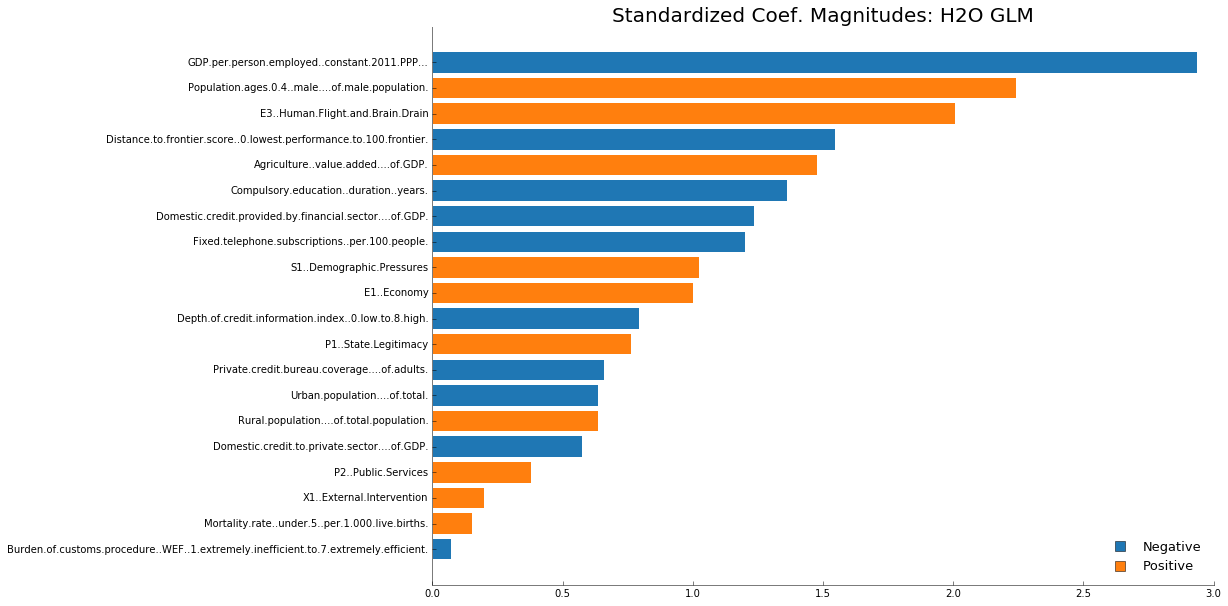

In [54]:
glm_kfold.varimp_plot(num_of_features=20)

In [41]:
dfoutput=pd.DataFrame.from_dict(glm_kfold.coef_norm(),orient='index')
dfoutput.columns=['coefficient']
dfoutput['abs(coef)']=abs(dfoutput['coefficient'])
dfoutput.sort('abs(coef)',ascending=False).head(50)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,abs(coef)
Intercept,55.984364,55.984364
E3..Human.Flight.and.Brain.Drain,-1.232632,1.232632
GDP.per.person.employed..constant.2011.PPP...,1.161068,1.161068
Distance.to.frontier.score..0.lowest.performance.to.100.frontier.,0.922500,0.922500
Fixed.telephone.subscriptions..per.100.people.,0.805148,0.805148
Compulsory.education..duration..years.,0.759818,0.759818
E1..Economy,-0.755426,0.755426
Urban.population....of.total.,0.699153,0.699153
Rural.population....of.total.population.,-0.699153,0.699153
Depth.of.credit.information.index..0.low.to.8.high.,0.643455,0.643455


In [23]:
dfoutput.to_csv('coefficients.csv')

In [44]:
selectedvar=dfoutput.loc[(dfoutput != 0).any(1)]

In [45]:
selectedvar

,coefficient,abs(coef)
Time.required.to.register.property..days.,-0.166769,0.166769
Merchandise.exports..current.US..,0.028318,0.028318
Mobile.cellular.subscriptions..per.100.people.,0.249328,0.249328
Population.ages.0.14....of.total.,-0.184039,0.184039
Population.growth..annual...,0.072823,0.072823
ICT.service.exports....of.service.exports..BoP.,0.272666,0.272666
S1..Demographic.Pressures,-0.544036,0.544036
Population.ages.40.44..male....of.male.population.,0.247085,0.247085
Strength.of.legal.rights.index..0.weak.to.12.strong.,0.056248,0.056248
Population.ages.60.64..female....of.female.population.,0.228993,0.228993


In [46]:
dropvar=dfoutput.loc[(dfoutput == 0).any(1)]

In [47]:
dropvar.to_csv('drop.csv')

http://localhost:54321/flow/index.html

### GBM

In [48]:
df=pd.read_csv('imputed_amelia21.csv')

In [52]:
drop=pd.read_csv('drop.csv')

In [54]:
drop.head()

,ID,NAME,coefficient,abs(coef)
0,1,Population.ages.65.and.above....of.total.,0,0
1,2,Manufacturing..value.added..constant.2010.US..,0,0
2,3,Net.primary.income..BoP..current.US..,0,0
3,4,C3..Group.Grievance,0,0
4,5,Employment.to.population.ratio..ages.15.24..female......modeled.IL...,0,0


In [56]:
dflist = drop['NAME'].tolist()

In [57]:
for i in dflist:
    del df[i]

In [58]:
df.head(10)

,country,year,Agriculture..value.added....of.GDP.,Agriculture..value.added..annual...growth.,Burden.of.customs.procedure..WEF..1.extremely.inefficient.to.7.extremely.efficient.,Claims.on.central.government..annual.growth.as...of.broad.money.,Compulsory.education..duration..years.,Computer..communications.and.other.services....of.commercial.service.exports.,Computer..communications.and.other.services....of.commercial.service.imports.,Cost.of.business.start.up.procedures....of.GNI.per.capita.,...,Urban.population....of.total.,C1..Security.Apparatus,C2..Factionalized.Elites,E1..Economy,E3..Human.Flight.and.Brain.Drain,P1..State.Legitimacy,P2..Public.Services,S1..Demographic.Pressures,X1..External.Intervention,GFSI.score
0,Algeria,2012,9.395778,7.200000,2.500000,-2.515248,10.0,64.088192,56.585177,12.1,...,68.870,7.1,6.8,5.5,5.4,7.2,5.9,6.1,5.5,48.1
1,Algeria,2013,10.643850,8.200000,2.700000,-0.309010,10.0,63.933330,53.626406,12.4,...,69.510,7.4,7.3,5.8,5.1,7.4,5.9,5.8,5.2,50.9
2,Algeria,2014,11.071537,2.500000,2.800000,10.376999,10.0,59.134659,56.028200,11.0,...,70.129,7.5,7.3,6.1,5.0,7.5,6.1,5.7,5.7,52.3
3,Algeria,2015,12.669948,6.400000,3.242268,20.495602,10.0,58.517163,55.954773,10.9,...,70.727,8.0,7.7,6.4,5.1,7.8,5.8,5.7,5.4,53.2
4,Algeria,2016,12.949289,2.100000,3.200000,16.023172,10.0,71.413984,71.601379,11.1,...,71.304,7.7,7.1,6.8,5.4,7.8,5.5,5.4,5.1,54.3
5,Angola,2012,41.087840,1.641250,2.295071,-13.501126,6.0,6.689385,76.871194,143.1,...,41.699,5.9,7.0,4.8,5.6,8.2,8.3,8.9,6.4,33.3
6,Angola,2013,44.128914,7.951475,2.200000,7.182458,6.0,4.356364,72.714351,130.1,...,42.490,6.1,7.3,5.1,5.9,8.6,8.4,8.9,6.1,33.3
7,Angola,2014,45.178751,1.085452,1.800000,16.705294,6.0,3.992516,74.717478,118.8,...,43.274,5.8,7.2,5.4,6.0,8.0,9.1,9.0,5.8,34.6
8,Angola,2015,39.304372,4.928407,2.765058,5.529907,6.0,5.425357,71.206443,22.5,...,44.050,6.0,7.2,5.6,6.0,8.3,8.9,8.7,5.6,34.1
9,Angola,2016,33.343011,-0.530017,3.028866,11.331345,6.0,13.663827,47.124374,27.5,...,44.819,6.2,7.2,6.1,6.3,8.8,9.2,9.0,5.6,34.1


In [59]:
df.to_csv('importantvar.csv')

In [89]:
gbmdata = h2o.import_file("/Users/zhaorc/Desktop/Practicum/train.csv")
test=h2o.import_file("/Users/zhaorc/Desktop/Practicum/test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [90]:
gbmdata.describe()

Rows:440
Cols:90




,country,year,Agriculture..value.added....of.GDP.,Agriculture..value.added..annual...growth.,Burden.of.customs.procedure..WEF..1.extremely.inefficient.to.7.extremely.efficient.,Claims.on.central.government..annual.growth.as...of.broad.money.,Compulsory.education..duration..years.,Computer..communications.and.other.services....of.commercial.service.exports.,Computer..communications.and.other.services....of.commercial.service.imports.,Cost.of.business.start.up.procedures....of.GNI.per.capita.,Current.account.balance....of.GDP.,Depth.of.credit.information.index..0.low.to.8.high.,Distance.to.frontier.score..0.lowest.performance.to.100.frontier.,Domestic.credit.provided.by.financial.sector....of.GDP.,Domestic.credit.to.private.sector....of.GDP.,Employment.to.population.ratio..15...female......modeled.ILO.estimate.,External.balance.on.goods.and.services....of.GDP.,Fixed.telephone.subscriptions..per.100.people.,Forest.area....of.land.area.,GDP.per.capita..constant.2010.US..,GDP.per.person.employed..constant.2011.PPP...,General.government.final.consumption.expenditure....of.GDP.,General.government.final.consumption.expenditure..annual...growth.,Gross.capital.formation....of.GDP.,Gross.national.expenditure....of.GDP.,Household.final.consumption.expenditure.per.capita..constant.2010.US..,Household.final.consumption.expenditure..etc.....of.GDP.,ICT.service.exports....of.service.exports..BoP.,Avg.of.Immunization.DPT.and.Measles,Incidence.of.tuberculosis..per.100.000.people.,Industry..value.added..annual...growth.,Labor.force.participation.rate..female....of.female.population.ages.15....modeled.ILO.estimate.,Manufacturing..value.added....of.GDP.,Merchandise.exports..current.US..,Merchandise.imports..current.US..,Merchandise.trade....of.GDP.,Military.expenditure....of.GDP.,Mobile.cellular.subscriptions..per.100.people.,Mortality.rate..under.5..per.1.000.live.births.,Net.current.transfers.from.abroad..current.US..,Net.taxes.on.products..current.US..,Personal.remittances..received....of.GDP.,PM2.5.air.pollution..population.exposed.to.levels.exceeding.WHO.guideline.value....of.total.,Population.ages.0.14....of.total.,Population.ages.0.4..female....of.female.population.,Population.ages.0.4..male....of.male.population.,Population.ages.10.14..male....of.male.population.,Population.ages.15.19..male....of.male.population.,Population.ages.15.64....of.total.,Population.ages.35.39..female....of.female.population.,Population.ages.35.39..male....of.male.population.,Population.ages.40.44..male....of.male.population.,Population.ages.45.49..male....of.male.population.,Population.ages.55.59..female....of.female.population.,Population.ages.55.59..male....of.male.population.,Population.ages.5.9..male....of.male.population.,Population.ages.60.64..female....of.female.population.,Population.ages.60.64..male....of.male.population.,Population.ages.65.69..female....of.female.population.,Population.ages.80.and.above..female....of.female.population.,Population.growth..annual...,Population.in.the.largest.city....of.urban.population.,Population.in.urban.agglomerations.of.more.than.1.million....of.total.population.,Price.level.ratio.of.PPP.conversion.factor..GDP..to.market.exchange.rate,Primary.education..duration..years.,Primary.school.starting.age..years.,Private.credit.bureau.coverage....of.adults.,Procedures.to.register.property..number.,Quality.of.port.infrastructure..WEF..1.extremely.underdeveloped.to.7.well.developed.and.efficient.by.international.standards.,Refugee.population.by.country.or.territory.of.origin,Rural.population....of.total.population.,Rural.population.growth..annual...,Services..etc...value.added....of.GDP.,Start.up.procedures.to.register.a.business..number.,Strength.of.legal.rights.index..0.weak.to.12.strong.,Tax.payments..number.,Time.required.to.get.electricity..days.,Time.required.to.register.property..days.,Unemployment..youth.male....of.male.labor.force.ages.15.24...modeled.ILO.estimate.,Unemployment..youth.total....of.total.labor.force.ages

In [91]:
## pick a response for the supervised problem
response = "GFSI.score"
#y = "2017IPC3AndAbove"
## the response variable is an integer, we will turn it into a categorical/factor for binary classification
#df[response] = df[response].asfactor()           

## use all other columns (except for the name & the response column ("survived")) as predictors
predictors = [name for name in gbmdata.columns if name not in ['C1','year','country', response]]
print (predictors)

['Agriculture..value.added....of.GDP.', 'Agriculture..value.added..annual...growth.', 'Burden.of.customs.procedure..WEF..1.extremely.inefficient.to.7.extremely.efficient.', 'Claims.on.central.government..annual.growth.as...of.broad.money.', 'Compulsory.education..duration..years.', 'Computer..communications.and.other.services....of.commercial.service.exports.', 'Computer..communications.and.other.services....of.commercial.service.imports.', 'Cost.of.business.start.up.procedures....of.GNI.per.capita.', 'Current.account.balance....of.GDP.', 'Depth.of.credit.information.index..0.low.to.8.high.', 'Distance.to.frontier.score..0.lowest.performance.to.100.frontier.', 'Domestic.credit.provided.by.financial.sector....of.GDP.', 'Domestic.credit.to.private.sector....of.GDP.', 'Employment.to.population.ratio..15...female......modeled.ILO.estimate.', 'External.balance.on.goods.and.services....of.GDP.', 'Fixed.telephone.subscriptions..per.100.people.', 'Forest.area....of.land.area.', 'GDP.per.capita

In [94]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=predictors,
              y=response,
              training_frame=gbmdata,
              validation_frame=test
            
              )
#It takes time

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
Errors/Warnings building gridsearch model

Hyper-parameter: col_sample_rate, 0.7
Hyper-parameter: max_depth, 0
Hyper-parameter: ntrees, 50
Hyper-parameter: sample_rate, 0.3
failure_details: Illegal argument(s) for GBM model: Grid_GBM_train2.hex_model_python_1501716257250_8_model_19.  Details: ERRR on field: _max_depth: _max_depth must be > 0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: Grid_GBM_train2.hex_model_python_1501716257250_8_model_19.  Details: ERRR on field: _max_depth: _max_depth must be > 0.

	at water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:20)
	at hex.tree.gbm.GBM.init(GBM.java:84)
	at hex.tree.SharedTree$Driver.computeImpl(SharedTree.java:194)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:173)
	at hex.ModelBuilder.trainModelNested(ModelBuild

In [95]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model


     col_sample_rate max_depth ntrees sample_rate  \
0                0.3        16    350         0.8   
1                0.8        16    200         0.5   
2                0.5        16     50         0.6   
3                0.8        16    250         0.6   
4                0.2         6    300         0.5   
5                0.9        10    100         0.9   
6                0.8         6    300         0.9   
7                0.3         6    200         0.2   
8                0.6        12    250         0.3   
9                0.7        16    150         0.9   
10               0.4         2    450         0.9   
11               0.7         6    450         0.2   
12               0.6         2    450         0.7   
13               0.1        14    300         0.1   
14               0.8         2    350         0.1   
15               1.0         2     50         0.7   
16               0.7         6      0         0.8   
17               0.3         8      0         

,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-08-03 21:29:27,28.532 sec,0.0,17.5373495,15.2428555,307.5586281,17.1281465,14.6663471,293.3734033
,2017-08-03 21:29:27,28.554 sec,1.0,15.8447763,13.7631463,251.0569362,15.5176887,13.2841902,240.7986615
,2017-08-03 21:29:27,28.572 sec,2.0,14.3127609,12.4299518,204.8551256,14.0908100,12.0674565,198.5509260
,2017-08-03 21:29:27,28.590 sec,3.0,12.9133350,11.1993726,166.7542203,12.8912310,10.9991086,166.1838373
,2017-08-03 21:29:27,28.607 sec,4.0,11.6635969,10.1083204,136.0394924,11.6766460,9.9394130,136.3440614
---,---,---,---,---,---,---,---,---,---
,2017-08-03 21:29:31,32.430 sec,67.0,0.4072821,0.2852082,0.1658787,2.0789826,1.5925295,4.3221685
,2017-08-03 21:29:31,32.462 sec,68.0,0.4003875,0.2811554,0.1603101,2.0774943,1.5907153,4.3159824
,2017-08-03 21:29:31,32.508 sec,69.0,0.3961526,0.2759193,0.1569369,2.0767055,1.5892434,4.3127059
,2017-08-03 21:29:35,36.521 sec,249.0,0.0539408,0.0309083,0.0029096,1.9985393,1.5171034,3.9941594



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Mortality.rate..under.5..per.1.000.live.births.,231056.9843750,1.0,0.3439927
E3..Human.Flight.and.Brain.Drain,133402.3906250,0.5773571,0.1986066
Rural.population....of.total.population.,72912.7890625,0.3155619,0.1085510
GDP.per.capita..constant.2010.US..,60282.3320312,0.2608981,0.0897471
P2..Public.Services,25305.8847656,0.1095223,0.0376749
---,---,---,---
Time.required.to.register.property..days.,57.8346138,0.0002503,0.0000861
Avg.of.Immunization.DPT.and.Measles,53.7889671,0.0002328,0.0000801
PM2.5.air.pollution..population.exposed.to.levels.exceeding.WHO.guideline.value....of.total.,17.1615753,0.0000743,0.0000255
Primary.education..duration..years.,1.6051072,0.0000069,0.0000024



See the whole table with table.as_data_frame()


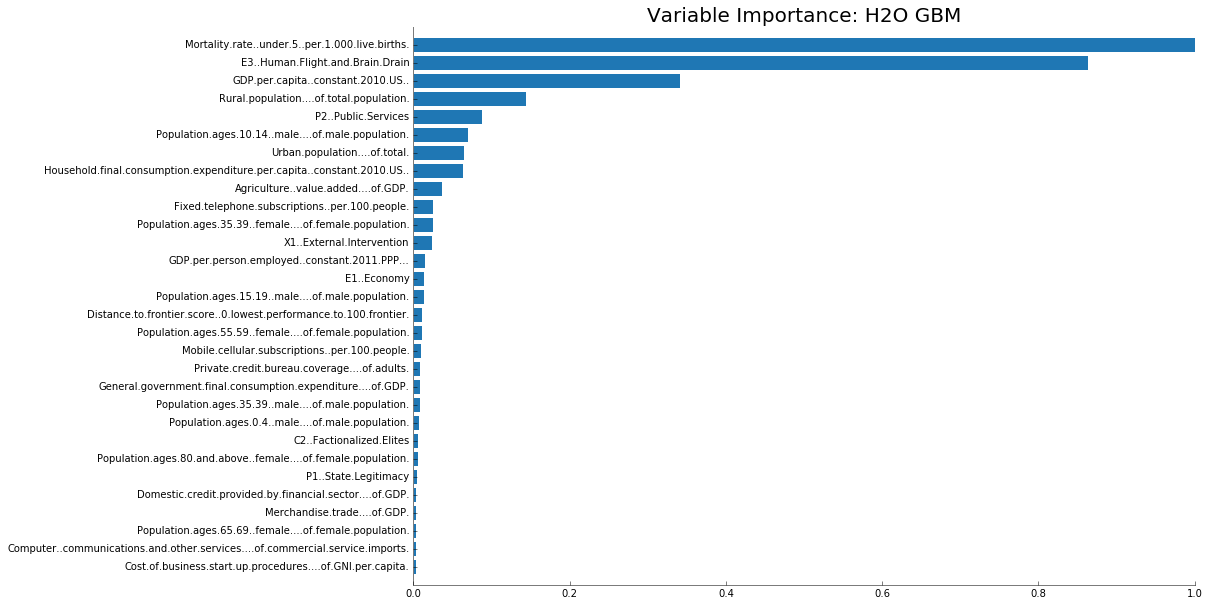

In [78]:
gbm_model.varimp_plot(num_of_features=30)

In [88]:
print(gbm_model_performance(tes_data=test).rmse())

NameError: name 'gbm_model_performance' is not defined

In [81]:
out=gbm_model.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [83]:
out.describe()

Rows:110
Cols:1




,predict
type,real
mins,28.916325252598313
mean,56.57892699936485
maxs,82.32543812245387
sigma,16.373601275173492
zeros,0
missing,0
0,55.50920958416884
1,34.80483636707561
2,78.06947849073879


In [85]:
h2o.export_file(out,'out.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


In [ ]:
gbmotp=pd.DataFrame.from_dict(glm_kfold.coef_norm(),orient='index')
dfoutput.columns=['coefficient']
dfoutput['abs(coef)']=abs(dfoutput['coefficient'])
dfoutput.sort('abs(coef)',ascending=False).head(50)

In [67]:
h2o.cluster().shutdown(prompt=False)

H2O session _sid_9da7 closed.


### Random Forest

In [ ]:
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model',
nfolds = 5)             # for easy lookup in flow

# train rf model
rf_model.train(
    x=predictors,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
rf_model

In [ ]:
dfoutputrf=pd.DataFrame(rf_model.varimp(use_pandas=True)).head(30)
dfoutputrf